## ДЗ №1

1. сгенерировать 500 точек с помощью метода make_blobs;
2. сгенерировать 450 точек с помощью метода make_circles, умножить координаты точек на 10;
3. отобразить на одном рисунке первые 500 точек красным цветом, а вторые 450  - зеленым.

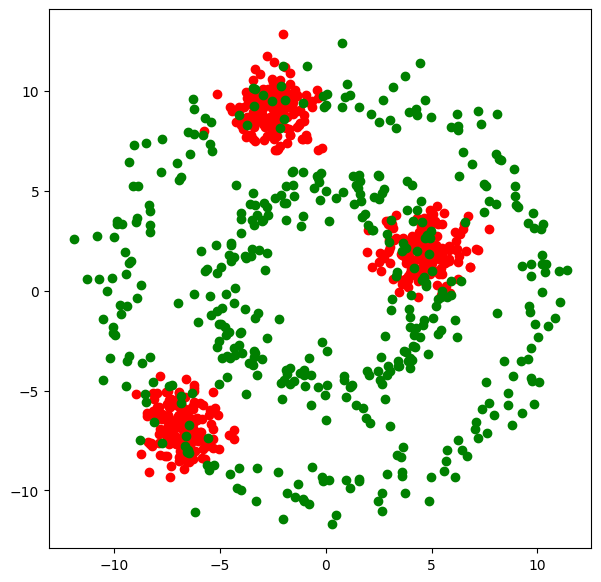

In [63]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles

X, _ = make_blobs(n_samples=500, random_state=42)
Y, _ = make_circles(n_samples=450, random_state=42, factor=0.5, noise=0.08)
Y = Y * 10

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c="r")
plt.scatter(Y[:, 0], Y[:, 1], c="g")
plt.show()

## ДЗ №2

1. Вывести результат работы алгоритма PCA для датасета digits.
2. Вывести результат работы алгоритма t-SNE для датасета digits.

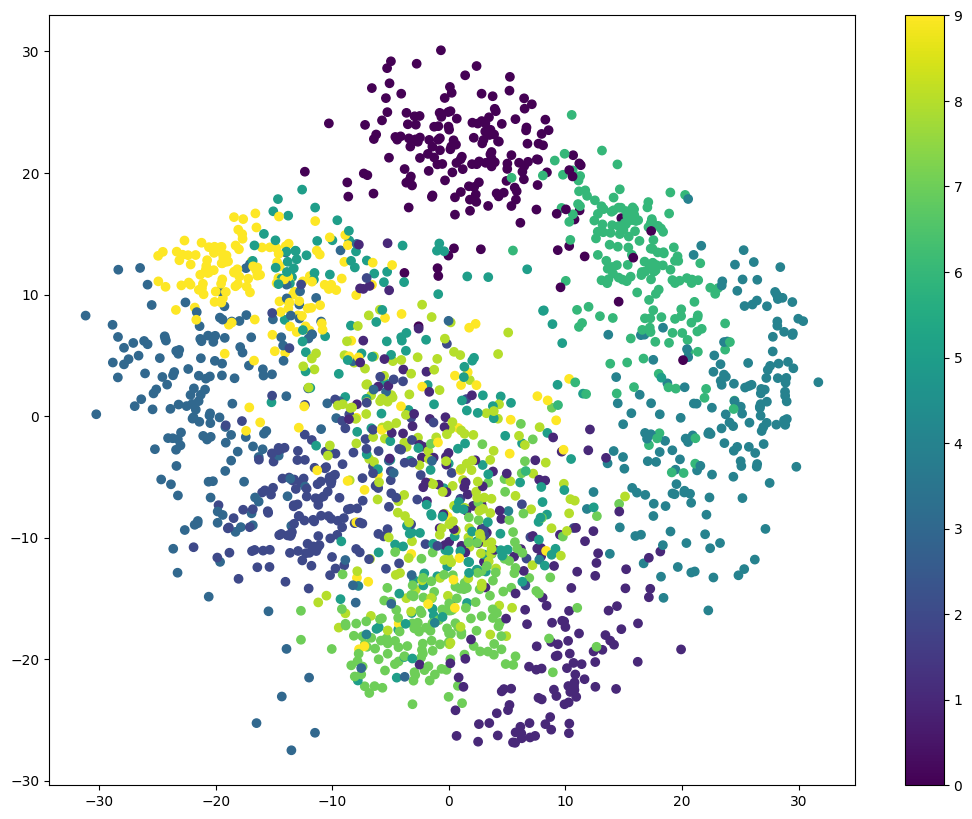

/home/sudden_appearance/.cache/pypoetry/virtualenvs/ml-2022-U845m8G1-py3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sudden_appearance/.cache/pypoetry/virtualenvs/ml-2022-U845m8G1-py3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


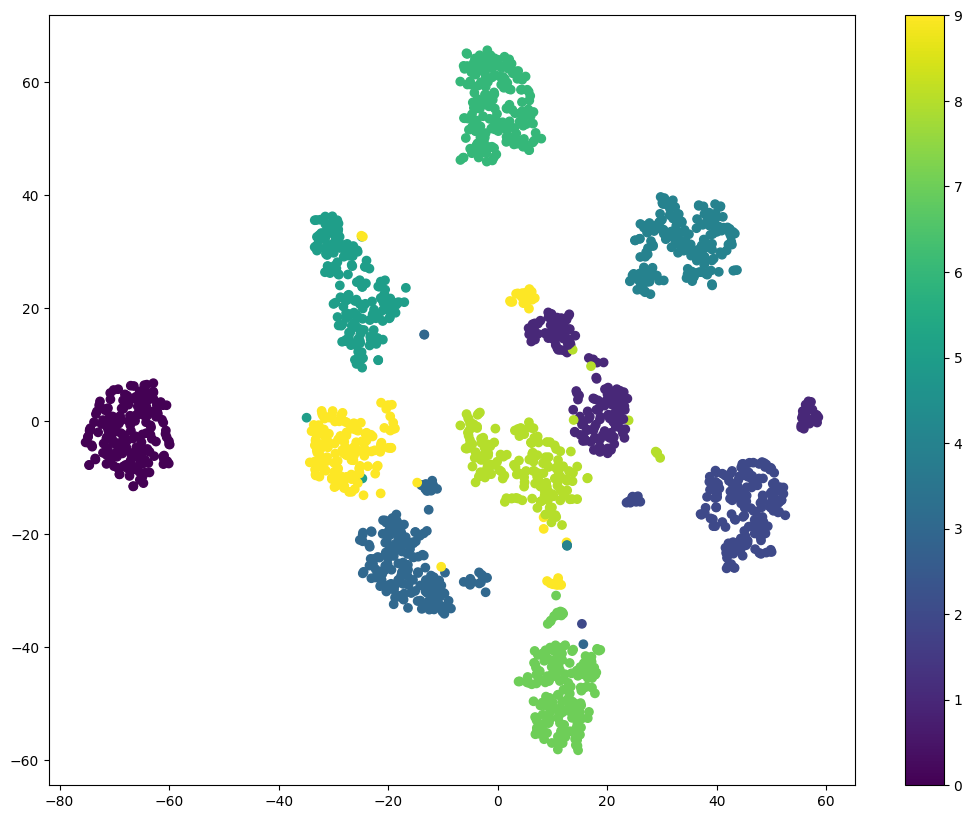

In [64]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()

pca = PCA(n_components=2)
X = pca.fit_transform(digits['data'])
y = digits['target']

plt.figure(figsize=(13, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
plt.show()

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X = tsne.fit_transform(digits['data'])
y = digits['target']

plt.figure(figsize=(13, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
plt.show()

## ДЗ №3 Суперпиксельная сегментация изображения

Дано:
- изображение (формат jpg/png)
- количество кластеров N (>50)
- задан нормировочный коэффициент k

Требуется:
- каждый пиксель представить в виде объекта с набором признаков $\{R, G, B, k*X, k*Y\}$ (где R – количество красного цвета, G – зеленого, B – синего, X - номер столбца, Y - номер строки)
- провести кластеризацию пикселей методом kmeans
- заменить в исходном изображении цвет каждого пикселя на цвет центра кластера, которому принадлежит пиксель
- повторить кластеризацию для разных значений коэффициента k

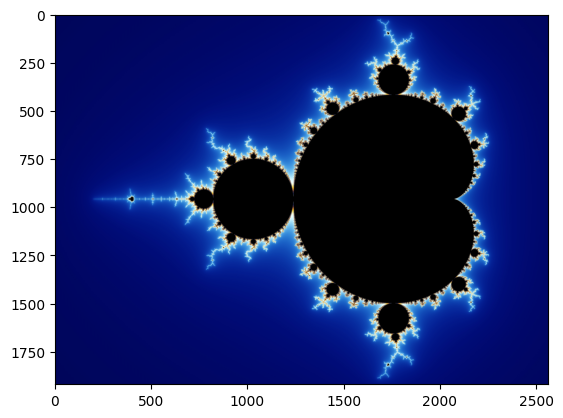

<Figure size 640x480 with 0 Axes>

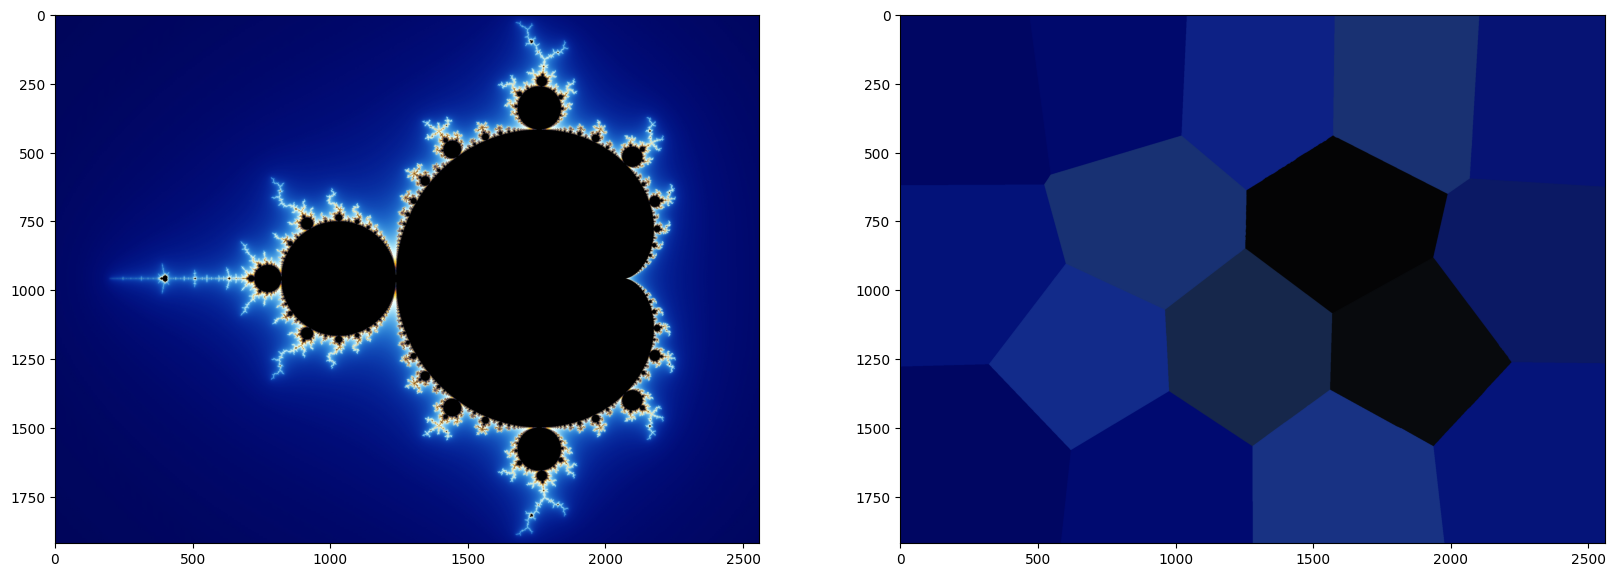

In [70]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from skimage.io import imread
import numpy as np

orig_img = imread('https://upload.wikimedia.org/wikipedia/commons/2/21/Mandel_zoom_00_mandelbrot_set.jpg')
plt.imshow(orig_img)
plt.show()

N = 16
k = 6

shape = list(orig_img.shape)
shape[2] = 5
img_copy = np.zeros(shape)
for i in range(orig_img.shape[0]):
    for j in range(orig_img.shape[1]):
        img_copy[i, j] = np.append(orig_img[i, j], [i * k, j * k])
X = img_copy.reshape((-1, img_copy.shape[-1]))

kmeans = KMeans(n_clusters=N).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
#new_img = centroids[labels].reshape(orig_img.shape)  # for png
new_img = centroids[labels].astype(int).reshape(img_copy.shape)[:,:,:3]  # for jpg

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=plt.cm.Paired)
plt.show()

fig, axarr = plt.subplots(nrows=1, ncols=2, sharex='all', figsize=(20, 8))
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)
plt.show()